In [25]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

# Get today's date
today = str(date.today())

In [5]:
import requests

def fetch_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception if request was unsuccessful
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error occurred: {e}")

# Example usage:
webpage_url = "https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=3608&position=1&pageNum=0"
webpage_text = fetch_text_from_url(webpage_url)
#print(webpage_text)
temp = {}


In [6]:
import re
list_url = {"Nvdia":"https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=3608&position=1&pageNum=0",
            "AMD":"https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=1497&position=1&pageNum=0",
            "TSMC":"https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=8869&position=1&pageNum=0",
            "Apple":"https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=162479&position=1&pageNum=0",
            "Microsoft":"https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=1035&position=1&pageNum=0",
            "Tesla":"https://www.linkedin.com/jobs/search?keywords=&location=%E5%85%A8%E7%90%83&locationId=&geoId=92000000&f_TPR=&f_C=15564&position=1&pageNum=0"}
result = pd.DataFrame([], columns = ["Name","Jobs","NewJobs"])
result = pd.DataFrame([], columns = ["Name","Jobs","NewJobs","NewRatioPrct"])

result = pd.DataFrame([], columns = ["Name","Jobs","NewJobs","NewRatioPrct","Date"])
for i in list_url:
    if(i not in temp):
        webpage_url = list_url[i]
        webpage_text = fetch_text_from_url(webpage_url)
        temp[i] = webpage_text
        print("Downloaded!")
    else:
        webpage_text = temp[i]
    pos_job_txt = str(re.findall("<title>.{0,200}title",webpage_text)).split(sep="Jobs")
    pos_job_txt[0] = int(str(re.sub(",","",str(re.findall("[0-9,]{1,10}",pos_job_txt[0])[0]))))
    pos_job_txt[1] = int(str(re.sub(",","",str(re.findall("[0-9,]{1,10}",pos_job_txt[1])[0]))))
    print(i,pos_job_txt[0],pos_job_txt[1])
    newstuff = pd.DataFrame([ i, pos_job_txt[0], pos_job_txt[1], (100*(pos_job_txt[1]/pos_job_txt[0])), today]).transpose()
    newstuff.columns = result.columns
    #print(newstuff)
    result = pd.concat(objs = [result,newstuff],axis=0)

    #result = pd.concat(objs = [result,pd.DataFrame({"Name":i,"Jobs":pos_job_txt[0],"NewJobs":pos_job_txt[1]})], axis =0, ignore_index=True)
result.index = [i for i in range(len(result))]
result
#webpage_text[pos_job_txt-100:pos_job_txt+100]

Downloaded!
Nvdia 750 58
Downloaded!
AMD 1000 51
Downloaded!
TSMC 318 1
Downloaded!
Apple 3000 57
Downloaded!
Microsoft 3000 225
Downloaded!
Tesla 8000 98


,Name,Jobs,NewJobs,NewRatioPrct,Date
0,Nvdia,750,58,7.733333,2023-05-30
1,AMD,1000,51,5.1,2023-05-30
2,TSMC,318,1,0.314465,2023-05-30
3,Apple,3000,57,1.9,2023-05-30
4,Microsoft,3000,225,7.5,2023-05-30
5,Tesla,8000,98,1.225,2023-05-30


In [9]:
csvfilename = './jobcount.csv'
#First time
#result.to_csv(csvfilename, index=False)
if(pd.read_csv(csvfilename).iloc[-1][-1]!=today):
    result.to_csv(csvfilename, index=False, mode = 'a', header=False)

In [12]:
df = pd.read_csv(csvfilename)

Index(['Name', 'Jobs', 'NewJobs', 'NewRatioPrct', 'Date'], dtype='object')


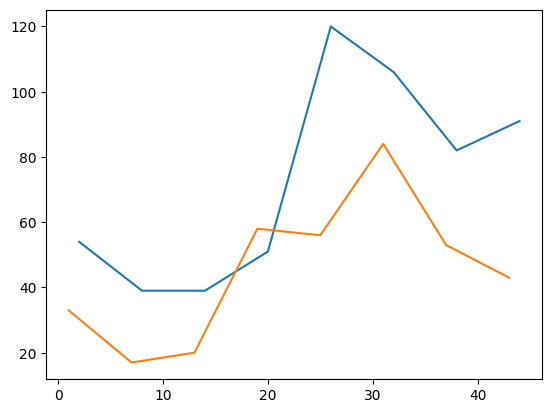

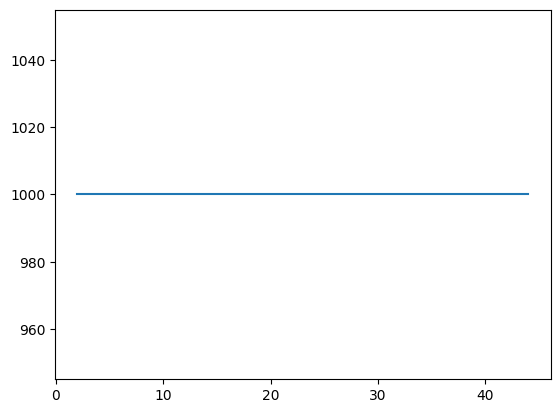

In [36]:
dfamd = df.loc[df["Name"]=="AMD"]
print(dfamd.columns)
plt.plot(dfamd["NewJobs"])
plt.plot(df.loc[df["Name"]=="Nvdia"]["NewJobs"])
plt.figure()
plt.plot(dfamd["Jobs"])